# Objective : Predict whether the customer will churn or not

# Strategy : Create mahine learning model which could predict it accurately
## To achieve that, I will divide the process into some parts : 
- 0. Preparation : 
    - 0.1 Import package needed
    - 0.2 Read data 
- 1. Exploratory Data analysis & data understanding
	- 1.1 check total number of null value
	- 1.2 check whether the dataset is imbalance or not
	- 1.3 check whether there is any categorical feature, or not
	- 1.4 Test the correlation
	- 1.5 Interactive visualization
		- 1.5.1 Know which value of categorical feature has highest  percentage of churn
		- 1.5.2 Analyze the distribution of numerical feature

- 2. Feature Engineering
	- 2.1 Encode the categorical feature
	- 2.2 Remove outlier 
	- 2.3 Feature selection
		- 2.3.1 Import the needed package for modelling
		- 2.3.2 Define feature and target then conduct train test split
		- 2.3.3 Create baseline model 
		- 2.3.4 Feature importance and Feature impact

- 3. Modelling 
	- 3.1 Define feature and target then conduct train test split
	- 3.2 Try Random Forest and LGBM with selected feature only
	- 3.3 Decide chosen model based on performance
		- 3.3.1 By accuracy
		- 3.3.2 By Confusion matrix
		- 3.3.3 By PR curve
	- 3.4 Hyperparameter tuning 

- 4. Evaluation. 
	- 4.1 Check accuracy
	- 4.2 Check confusion matrix 
	- 4.3 Check PR curve
	- 4.4 Use K-FOLD to know the stability of final model

- 5. Predict Testing Data and Submission 

# 0. Preparation
## 0.1 Import Basic Package Needed

In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

from ipywidgets import interact, interact_manual #for interactive visualization

In D:\Users\bsi80086\AppData\Local\Continuum\anaconda3\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test.mplstyle: 
The text.latex.preview rcparam was deprecated in Matplotlib 3.3 and will be removed two minor releases later.
In D:\Users\bsi80086\AppData\Local\Continuum\anaconda3\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test.mplstyle: 
The mathtext.fallback_to_cm rcparam was deprecated in Matplotlib 3.3 and will be removed two minor releases later.
In D:\Users\bsi80086\AppData\Local\Continuum\anaconda3\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test.mplstyle: Support for setting the 'mathtext.fallback_to_cm' rcParam is deprecated since 3.3 and will be removed two minor releases later; use 'mathtext.fallback : 'cm' instead.
In D:\Users\bsi80086\AppData\Local\Continuum\anaconda3\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test.mplstyle: 
The validate_bool_maybe_none function was deprecated in Matplotlib 3.3 and will be removed two minor 

## 0.2 Read Data

In [2]:
data = pd.read_csv('findata_challenge_train.csv')

In [3]:
data.head()

,x0,x1,x2,x3,x4,x5,x6,x7,x8,x9,...,x116,x117,x118,x119,x120,x121,x122,x123,x124,y
0,0.067563,-2.172492,-1.713774,-0.146854,-0.685219,-0.933838,4.0,2.0,-4.476051,-1.472306,...,4.607926,52.0,1.0,0.773809,0.766531,6.307142,9.074515,-2.694049,0.330964,0
1,0.099622,0.584803,-6.089758,-0.252186,-0.334912,-4.671281,4.0,2.0,-0.387076,-0.664552,...,15.889763,53.0,1.0,7.065852,0.994304,-0.028411,-21.472850,5.626095,1.293455,0
2,0.648421,3.881137,0.961359,0.217361,-1.471850,-0.975352,5.0,1.0,-0.850146,-4.011487,...,13.770410,53.0,1.0,-8.598553,-2.958302,-12.784030,-36.855873,0.356093,1.499790,0
3,0.005775,-2.726153,2.891378,-0.038325,2.280847,1.761478,3.0,3.0,9.116188,-4.610151,...,5.904901,50.0,1.0,8.194975,-7.798308,10.910515,15.226094,-10.440813,-0.735116,0
4,0.044396,2.803576,-1.923381,-0.116657,-1.574199,6.098627,3.0,1.0,-13.956141,13.785099,...,-14.603703,47.0,0.0,2.330789,-8.249825,-12.680490,40.192302,-5.037065,1.679262,1


# 1. Exploratory Data Analysis & Data understanding

## 1.1 Check total number of NULL value

In [4]:
min(data.count())

99841

In [5]:
max(data.count())

100000

In [6]:
99841/100000

0.99841

#### Conclusion of process 1.1 = IF we delete all of the row that consist even one NULL value, we will still have more than 99% of the data. It's insignificant, so therefore we will drop all of the row with NULL value

### Drop all of the row with NULL value

In [7]:
data = data.dropna()

In [8]:
#check if there isn't any row with NULL value
max(data.isna().sum())

0

## 1.2 Check whether the dataset is imbalance or not

In [9]:
data.y.value_counts()

0    69692
1    14284
Name: y, dtype: int64

In [10]:
14284/(14284+69692)

0.1700962179670382

#### Conclusion of process 1.2 = the dataset is highly imbalance. the ratio is :
1 = 17% of the data and
0 = 83% of the data

#### Therefore, we will utilize PR curve instead of ROC curve (Reference : https://sinyi-chou.github.io/classification-pr-curve/ ) We also might try oversampling method if needed to overcome the imbalance problem

## 1.3 Check whether there is any categorical feature, or all of them are numerical? 

In [11]:
# extract the categorical variables
cat_var = [ feature for feature in data.columns if data[feature].dtypes=='O']
print('List of categorical variables {}'.format(cat_var))

List of categorical variables ['x21', 'x79', 'x89', 'x108', 'x112']


In [12]:
data[['x21', 'x79', 'x89', 'x108', 'x112']].head()

,x21,x79,x89,x108,x112
0,Jun,Laki-laki,Jambi,SMP,May
2,Jul,Perempuan,Sumatera Selatan,SD,Jun
3,Jun,Laki-laki,Kalimantan Utara,SMP,Sep
4,Jul,Laki-laki,Kalimantan Utara,SMA/SMK,Jun
5,Jul,Perempuan,Jambi,SMP,Jul


#### So there are five categorical feature and we will conduct descriptive analysis

In [13]:
def with_per(total, axis):
    for p in axis.patches:
        percentage = '{:.1f}%'.format(100 * p.get_height()/total)
        x = p.get_x() + p.get_width()
        y = p.get_height()
        ax.annotate(percentage, (x, y),ha='center')

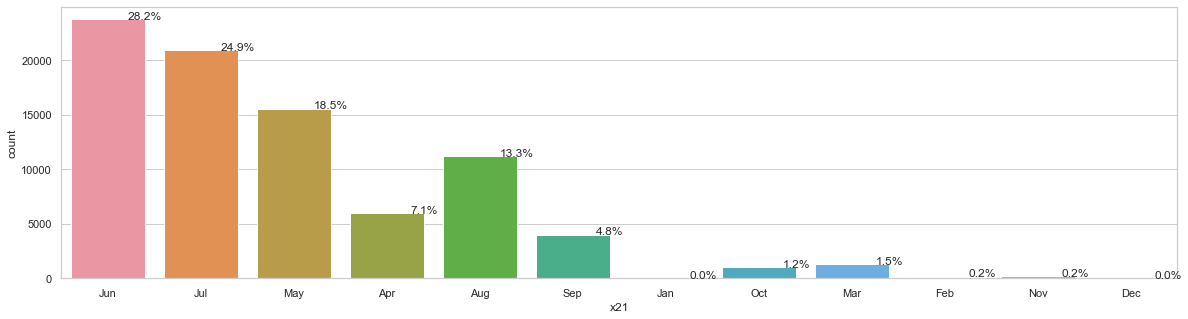

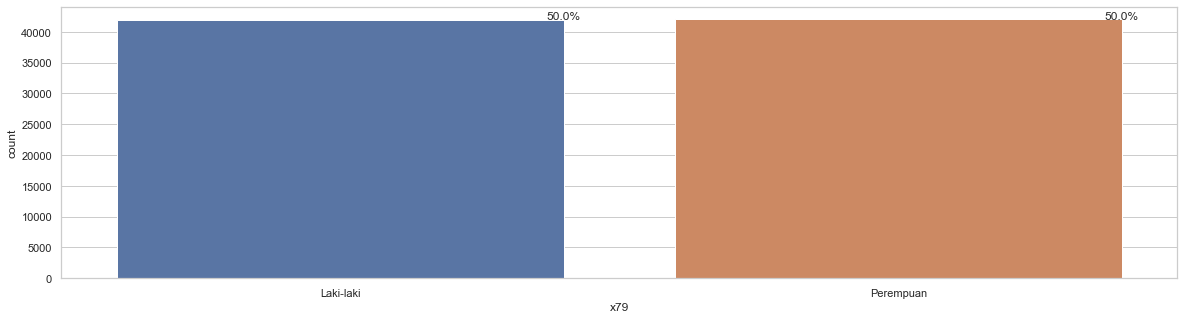

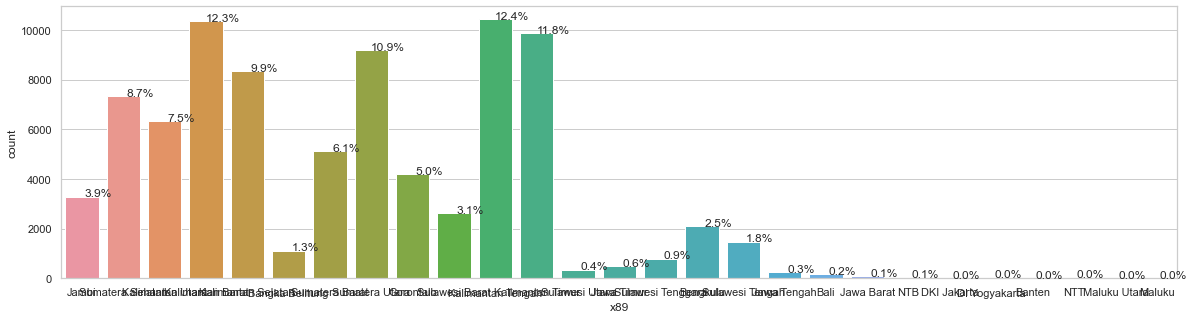

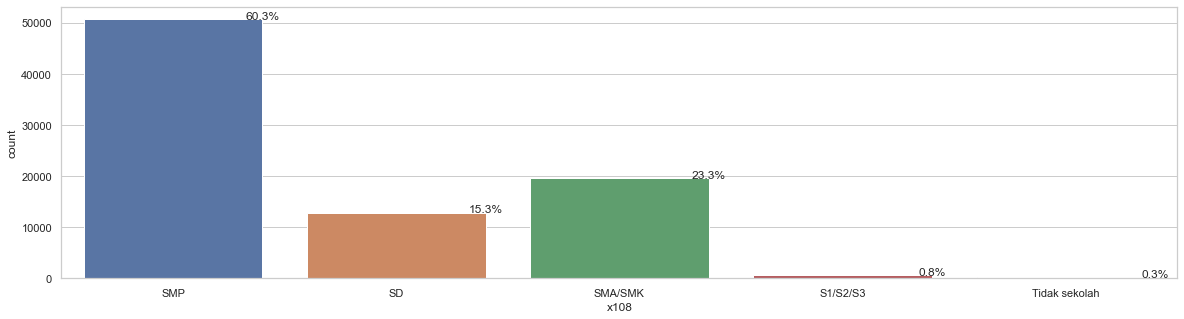

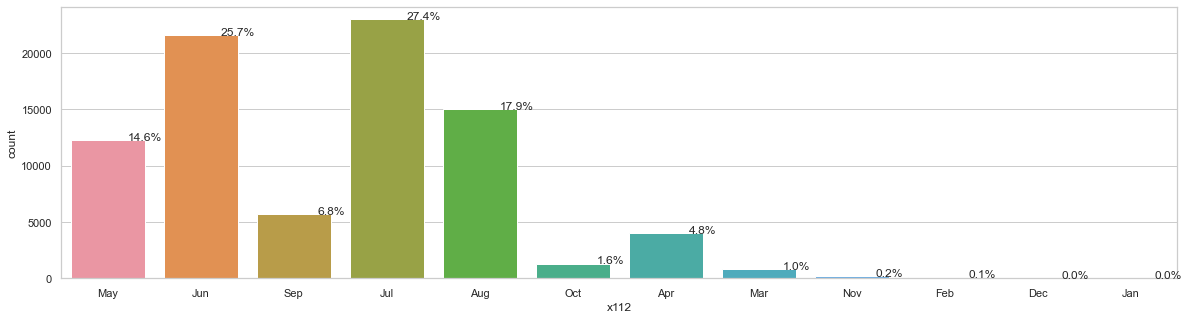

In [14]:
#display the all the categorical variable 
for feature in cat_var:
    sns.set(style = 'whitegrid')
    plt.figure(figsize=(20,5))
    total = len(data)
    ax = sns.countplot(x = data[feature], data = data)
    #plt.title(feature)
    with_per(total, ax)
    plt.show()

In [15]:
#Extract the numerical features from the dataset
num_var = [feature for feature in data.columns if data[feature].dtypes != 'O']
print('List of Numerical featues {}'.format(num_var))

List of Numerical featues ['x0', 'x1', 'x2', 'x3', 'x4', 'x5', 'x6', 'x7', 'x8', 'x9', 'x10', 'x11', 'x12', 'x13', 'x14', 'x15', 'x16', 'x17', 'x18', 'x19', 'x20', 'x22', 'x23', 'x24', 'x25', 'x26', 'x27', 'x28', 'x29', 'x30', 'x31', 'x32', 'x33', 'x34', 'x35', 'x36', 'x37', 'x38', 'x39', 'x40', 'x41', 'x42', 'x43', 'x44', 'x45', 'x46', 'x47', 'x48', 'x49', 'x50', 'x51', 'x52', 'x53', 'x54', 'x55', 'x56', 'x57', 'x58', 'x59', 'x60', 'x61', 'x62', 'x63', 'x64', 'x65', 'x66', 'x67', 'x68', 'x69', 'x70', 'x71', 'x72', 'x73', 'x74', 'x75', 'x76', 'x77', 'x78', 'x80', 'x81', 'x82', 'x83', 'x84', 'x85', 'x86', 'x87', 'x88', 'x90', 'x91', 'x92', 'x93', 'x94', 'x95', 'x96', 'x97', 'x98', 'x99', 'x100', 'x101', 'x102', 'x103', 'x104', 'x105', 'x106', 'x107', 'x109', 'x110', 'x111', 'x113', 'x114', 'x115', 'x116', 'x117', 'x118', 'x119', 'x120', 'x121', 'x122', 'x123', 'x124', 'y']


## 1.4 Test the correlation as the consideration in the future modelling : which feature should be always included?

In [16]:
correlation = pd.DataFrame(data.corr().y.sort_values(ascending = False)).reset_index()

In [17]:
correlation.head(20)

,index,y
0,y,1.000000
1,x17,0.138550
2,x106,0.115947
3,x92,0.087967
4,x91,0.075798
5,x118,0.068389
6,x46,0.067997
7,x28,0.067801
8,x96,0.065796
9,x104,0.063423


#### Conclusion of process 1.4 : if we set the cut-off of the correlation value to 0.05, then we will only get 10 variable that should always be included in the modelling (although we will create baseline model first that will include all of the feature, then maybe we will analyze which have both high feature importance, feature impact and high correlation value.)

## 1.5 Interactive visualization to conduct data analysis
### 1.5.1 Know which value of categorical feature has highest percentage of churn 

In [18]:
#input the categorical feature and all of its value into one new table called categorical_table
categorical_table = data[['x21', 'x79', 'x89', 'x108', 'x112','y']]

In [19]:
@interact_manual
def interactcompr(x_ = categorical_table.columns, color_ = categorical_table.columns, barnormm = [None]+['percent'], numbin = (0,100,10)):
    titlee1 =  x_ + ' Histogram divided by ' + color_ #please always use 'y' as the color
    return px.histogram(x = x_, barnorm = barnormm, color = color_, data_frame = categorical_table, nbins = numbin, title = titlee1).update_xaxes(categoryorder = "total ascending")

#for my analysis, I will always use 'y' as the color, and 'percent' as barnorm.
#but user could analyze it freely and interactively

interactive(children=(Dropdown(description='x_', options=('x21', 'x79', 'x89', 'x108', 'x112', 'y'), value='x2…

#### Conclusion of 1.5.1 : 
- x21 and x112 is month. so we will encode Jan = 1, Feb = 2, Mar = 3, and so on
- x79 is gender. we will encode Perempuan = 0 and Laki-laki = 1 since percentage of y = 0 is higher in 'Perempuan' category, rather than 'Laki-laki'
- x89 is region. we will encode Jakarta = 0, Banten = 1, NTT = 3, Sulawesi Barat = 4, and so on (sort from the highest percentage of y = 0)
- x108 is education level. it could be sorted logically. Tidak sekolah = 0, SD = 1, SMP = 2, and so on

#### But hypothetically, all of the categorical variable might not have high importance in machine learning since almost all of them are distributed equally if we see the percentage of y = 0. 


### 1.5.2 Know the distribution of each numerical feature. This could be done interactively 

In [20]:
numerical_table = data[num_var]

In [21]:
@interact_manual
def interactcompr(x_box = categorical_table.columns, y_box = numerical_table.columns, color_box = categorical_table.columns):
    title_box =  x_box + ' boxplot divided by ' + y_box + 'and' + color_box   #please always use 'y' as the color
    return px.box(data_frame = data, x = x_box, y = y_box, color = color_box)

interactive(children=(Dropdown(description='x_box', options=('x21', 'x79', 'x89', 'x108', 'x112', 'y'), value=…

Example of analysis result: 
- There are a lot of outliers in some value I try to analyze
- it's strongly recommended to use feature with less kind of value (for instance : gender) to make the visualization more focus on our eye
- if we use x21 (month) as x, and any kind of value as y_box, and the target as color, we can see the distribution of y_box value from month to month : is it going up or going down, etc


# 2. Feature Engineering
## 2.1 Encode the categorical feature
### We will encode them for the machine learning baseline model that include all of the feature. This will be done after knowing which category has the highest percentage of churn. We already know this info from previous process (exploratory data analysis, part 1.5.1)

In [20]:
#encode the month feature
data['month_1_encode']=data['x21'].map({'Jan':1,
                                        'Feb':2,
                                        'Mar':3,
                                        'Apr':4,
                                        'May':5,
                                        'Jun':6,
                                        'Jul':7,
                                        'Aug':8,
                                        'Sep':9,
                                        'Oct':10,
                                        'Nov':11,
                                        'Dec':12})

data['month_2_encode']=data['x112'].map({'Jan':1,
                                         'Feb':2,
                                         'Mar':3,
                                         'Apr':4,
                                         'May':5,
                                         'Jun':6,
                                         'Jul':7,
                                         'Aug':8,
                                         'Sep':9,
                                         'Oct':10,
                                         'Nov':11,
                                         'Dec':12})

In [21]:
#encode the gender
data['gender_encode'] = data['x79'].map({'Perempuan':0,'Laki-laki':1})

In [22]:
#encode the region
data['region_encode'] = data['x89'].map({'DKI Jakarta'       :0,
                                         'Banten'            :1,
                                         'NTT'               :2,
                                         'Sulawesi Barat'    :3,
                                         'Bengkulu'          :4,
                                         'Kalimantan Tengah' :5,
                                         'Bangka Belitung'   :6,
                                         'Sulawesi Tenggara' :7,
                                         'Kalimantan Selatan':8,
                                         'Kalimantan Timur'  :9,
                                         'Sumatera Selatan'  :10,
                                         'Jambi'             :11,
                                         'Kalimantan Barat'  :12,
                                         'Kalimantan Utara'  :13,
                                         'Sumatera Barat'    :14,
                                         'Gorontalo'         :15,
                                         'Sulawesi Utara'    :16,
                                         'Bali'              :17,
                                         'Sulawesi Tengah'   :18,
                                         'Sumatera Utara'    :19,
                                         'Jawa Tengah'       :20,
                                         'Jawa Barat'        :21,
                                         'Jawa Timur'        :22,
                                         'NTB'               :23,
                                         'DI Yogyakarta'     :24,
                                         'Maluku'            :25,
                                         'Maluku Utara'      :26})

In [23]:
#encode the education level
data['education_encode'] = data['x108'].map({'Tidak sekolah':0,
                                             'SD'           :1,
                                             'SMP'          :2,
                                             'SMA/SMK'      :3,
                                             'S1/S2/S3'     :4})

## 2.2 I plan to utilize tree based model, so it doesn't really need the outlier detection & removal (reference : https://datascience.stackexchange.com/questions/37394/are-decision-trees-robust-to-outliers )

## 2.3 Feature Selection 
it's very crucial to do feature selection (ref : https://www.aretove.com/importance-of-feature-selection-in-machine-learning ) but in order to do that, I have to create baseline model to know feature importance

### 2.3.1 Import the needed package for modelling

In [24]:
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from mlxtend.plotting import plot_decision_regions
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_auc_score,roc_curve
from sklearn import datasets
from sklearn.metrics import precision_recall_curve

import lightgbm as lgb
import xgboost as xgb
import shap

### 2.3.2 Define feature and target then conduct train test split

In [25]:
#define 
X = data.drop(['x21', 'x79', 'x89', 'x108', 'x112','y'],axis = 1)
y = data['y']

##### I have to add this code to prevent the error (ref : https://www.kaggle.com/questions-and-answers/132668 , and https://datascience.stackexchange.com/questions/11928/valueerror-input-contains-nan-infinity-or-a-value-too-large-for-dtypefloat32 )

In [26]:
#check the existance of NaN (Not a Number). It's different with NULL value that already deleted in the pre-processing step
np.where(np.isnan(X))

(array([], dtype=int64), array([], dtype=int64))

In [27]:
#to replace nan(Not A Number) with zero and inf with finite numbers in an array. 
#It returns (positive) infinity with a very large number and negative infinity with a very small (or negative) number

#if the code below generates error message "input contains nan, infinity, or a value too large for dtypefloat32", 
#please uncomment line below

#X = np.nan_to_num(X)

In [28]:
#train test split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = 0.2)

### 2.3.3 Create baseline model with four model 
- Random Forest
- Gradient Boosting
- LightGBM
- XGboost

In [29]:
#fit  Default Random Forest model to dataset
RF = RandomForestClassifier()
RF.fit(X_train, y_train)

#use  model to make predictions
y_score_RF = RF.predict_proba(X_test)[:, 1]

In [30]:
#fit  Gradient Boosting model to dataset
GB = GradientBoostingClassifier()
GB.fit(X_train, y_train)

#use  model to make predictions
y_score_GB = GB.predict_proba(X_test)[:, 1]

In [31]:
#fit Light Gradient Boosting model to dataset
LGBM = lgb.LGBMClassifier()
LGBM.fit(X_train, y_train)

#use  model to make predictions
y_score_LGBM = LGBM.predict_proba(X_test)[:, 1]

In [32]:
#fit Xtreme Gradient Boosting model to dataset
xgboost = xgb.XGBClassifier()

# Fit
xgboost.fit(X_train, y_train)

# Predict
y_score_xgb = xgboost.predict_proba(X_test)[:, 1]

The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].


[20:15:34] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


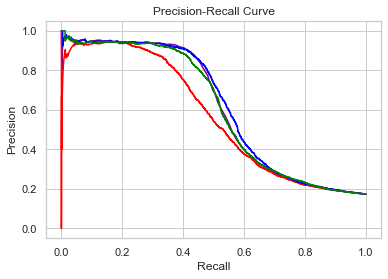

In [33]:
#calculate precision and recall
precision_RF, recall_RF, thresholds_RF = precision_recall_curve(y_test, y_score_RF)
precision_GB, recall_GB, thresholds_GB = precision_recall_curve(y_test, y_score_GB)
precision_LGB, recall_LGB, thresholds_LGB = precision_recall_curve(y_test, y_score_LGBM)
precision_XGB, recall_XGB, thresholds_XGB = precision_recall_curve(y_test, y_score_xgb)

#create precision recall curve
fig, ax = plt.subplots()
ax.plot(recall_RF, precision_RF, color='purple')
ax.plot(recall_GB, precision_GB, color='red')
ax.plot(recall_LGB, precision_LGB, color='blue')
ax.plot(recall_XGB, precision_XGB, color='green')

#add axis labels to plot
ax.set_title('Precision-Recall Curve')
ax.set_ylabel('Precision')
ax.set_xlabel('Recall')

#display plot
plt.show()

#### Conclusion : the blue line ( Light Gradient Boosting model) and purple line (Random Forest model) show the best PR curve, and red line (gradient boosting) show the worst model. So I will use the Light Gradient Boosting and Random Forest

### 2.3.4 Feature importance & Feature impact

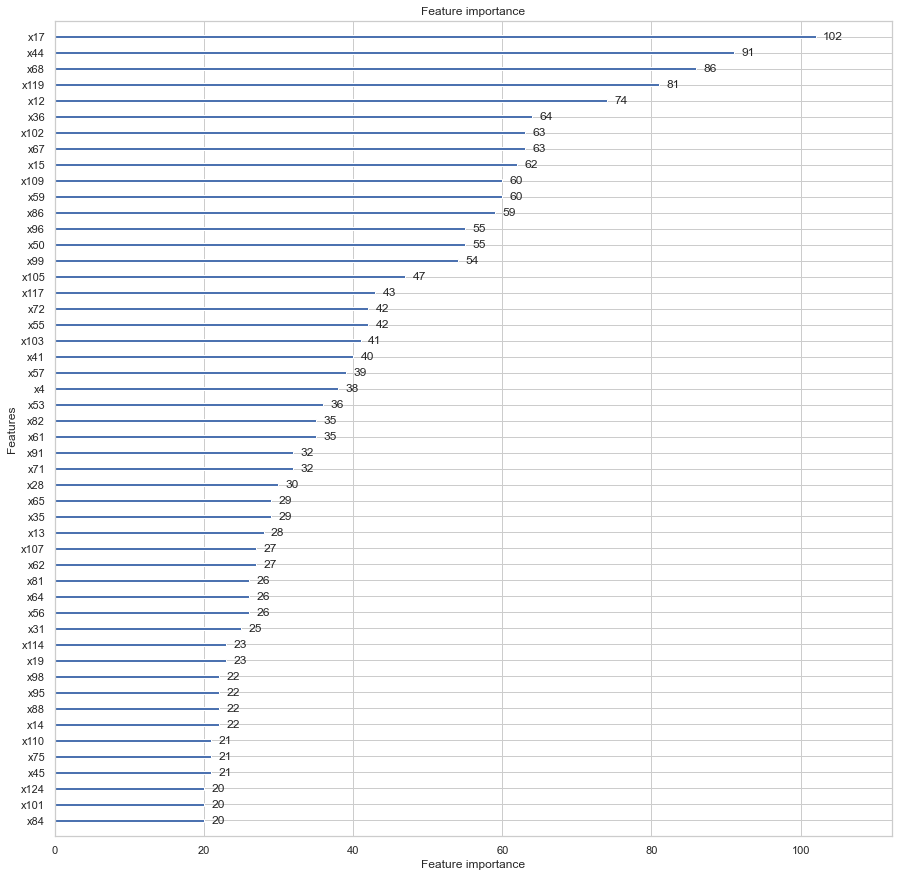

In [34]:
#based on LGB
ax = lgb.plot_importance(LGBM, max_num_features=50, figsize=(15,15))
plt.show()

In [35]:
#based on Random Forest
feat_imp_RF = pd.DataFrame(RF.feature_importances_, columns = ['Importances']).join(pd.DataFrame(X_train.columns,columns = ['Features']))
feat_imp_RF = feat_imp_RF.sort_values(by='Importances', ascending = False)
feat_imp_RF.head(50)

,Importances,Features
43,0.029951,x44
17,0.019993,x17
102,0.019131,x105
4,0.017697,x4
40,0.016668,x41
114,0.015380,x119
99,0.014583,x102
67,0.013903,x68
56,0.013757,x57
54,0.013337,x55


##### Next is based on shuffling data. the illustration will be shown by this illustration
<img src="feature impact explanation.jpg" width="720" height="720" align="center"/>

In [36]:
#based on shuffling data. the illustration is shown above
kolom = []
nonshuffle = []
shuffle = []
scoring = []
datashuf = X_train.copy()
for i in range(len(datashuf.columns)):
    datashuf = X_train.copy()
    kolom.append(datashuf.columns[i])
    y_predictnoshuf = LGBM.predict_proba(X_train)[:,1]
    datashuf[datashuf.columns[i]] = np.random.permutation(datashuf[datashuf.columns[i]].values)
    y_predictshuf = LGBM.predict_proba(datashuf)[:,1]
    delta = sum(abs(y_predictnoshuf-y_predictshuf))
    scoring.append(delta)

Scoring_num = pd.DataFrame(scoring, index = datashuf.columns, columns = ['Importance']).sort_values('Importance', ascending=False).reset_index()

In [37]:
Scoring_num.head(50)

,index,Importance
0,x44,3143.928906
1,x17,2719.865136
2,x67,1999.861659
3,x96,1272.030583
4,x68,1247.155880
5,x12,1074.979894
6,x119,1069.433015
7,x102,971.230951
8,x59,897.135318
9,x109,886.396569


#### Conclusion : based on feature importance Random Forest, feature importance Feature modelling, feature impact and correlation, I could get the list of features that will be used in the final modelling. 
I basically could know which feature get which rank from all those 4 consideration. To sum up, it's easily displayed by heatmap down below. 
<img src="heatmap of feature ranking.png" width="720" height="720" align="center"/>

After x61 feature that has average rank 38, the average rank is dropped. That's why I decide x61 as the last feature that I will use for modelling

## 3. Modelling (with only selected feature)

### 3.1 Define selected feature and train test split 

In [63]:
#define selected feature
X_new = data[['x17', 'x15', 'x44', 'x68', 'x119','x67','x96',
              'x12','x59','x4','x105','x109','x102','x117',
              'x50','x61']]
y_new = data['y']

In [64]:
#train test split
X_train_new, X_test_new, y_train_new, y_test_new = train_test_split(X_new,y_new,test_size = 0.2)

### 3.2 Try Random Forest model and Light Gradient Boosting Model with selected feature

In [65]:
#fit Random Forest model to new dataset with selected feature
RF_new = RandomForestClassifier()
RF_new.fit(X_train_new, y_train_new)

#use  model to make predictions
y_score_RF_new = RF_new.predict_proba(X_test_new)[:, 1]

In [66]:
#fit Light Gradient Boosting model to new dataset with selected feature
LGBM_new = lgb.LGBMClassifier()
LGBM_new.fit(X_train_new, y_train_new)

#use  model to make predictions
y_score_LGBM_new = LGBM_new.predict_proba(X_test_new)[:, 1]

### 3.3 Evaluate the performance of those two models by using 
- accuracy
- confusion matrix
- PR curve

#### so we could decide which final model that we will tune its hyperparameter

### 3.3.1 By accuracy

In [67]:
print("\nScore Random Forest: ", RF_new.score(X_test_new,y_test_new))


Score Random Forest:  0.8914622529173613


In [68]:
print("\nScore Light Gradient Boosting : ", LGBM_new.score(X_test_new,y_test_new))


Score Light Gradient Boosting :  0.8874732079066444


### 3.3.2 By Confusion Matrix

In [69]:
#check another metric, which is confusion matrix and accuracy
RFmodel_conf_mat = pd.DataFrame(confusion_matrix(y_test_new,RF_new.predict(X_test_new)), 
                                index = ['Actual 0', 'Actual 1'], 
                                columns = ['Predict 0', 'Predict 1'])

In [70]:
RFmodel_conf_mat

,Predict 0,Predict 1
Actual 0,13819,125
Actual 1,1698,1154


In [71]:
#check another metric, which is confusion matrix and accuracy
LGBmodel_conf_mat = pd.DataFrame(confusion_matrix(y_test_new,LGBM_new.predict(X_test_new)), 
                                 index = ['Actual 0', 'Actual 1'], 
                                 columns = ['Predict 0', 'Predict 1'])

In [72]:
LGBmodel_conf_mat

,Predict 0,Predict 1
Actual 0,13802,142
Actual 1,1748,1104


### 3.3.3 By PR Curve

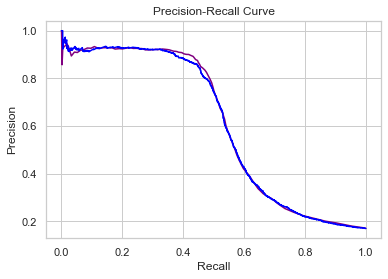

In [73]:
#calculate precision and recall
precision_RF_new, recall_RF_new, thresholds_RF_new = precision_recall_curve(y_test_new, y_score_RF_new)
precision_LGB_new, recall_LGB_new, thresholds_LGB_new = precision_recall_curve(y_test_new, y_score_LGBM_new)

#create precision recall curve
fig, ax = plt.subplots()
ax.plot(recall_RF_new, precision_RF_new, color='purple')
ax.plot(recall_LGB_new, precision_LGB_new, color='blue')

#add axis labels to plot
ax.set_title('Precision-Recall Curve')
ax.set_ylabel('Precision')
ax.set_xlabel('Recall')

#display plot
plt.show()

#### Conclusion : Random Forest has better performance rather than Light Gradient Boosting, based on accuracy, confusion matrix and PR curve, 

### 3.4 Hyperparameter tuning
#### Find the best hyperparameter with randomized search cv from sklearn 

In [50]:
from sklearn.model_selection import RandomizedSearchCV
# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 200, stop = 2000, num = 10)]
# Number of features to consider at every split
max_features = ['auto', 'sqrt']
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(10, 110, num = 11)]
max_depth.append(None)
# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 4]
# Method of selecting samples for training each tree
bootstrap = [True, False]
# Create the random grid
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}

In [52]:
# CAUTION : code below is already executed. Please don't execute it again since the best parameter is already known and shown below
# EXCEPT we want to try other method and change the range of hyperparameter above

# Use the random grid to search for best hyperparameters

# Random search of parameters, using 3 fold cross validation, 
# search across 100 different combinations, and use all available cores
rf_random = RandomizedSearchCV(estimator = RF_new, param_distributions = random_grid, n_iter = 100, cv = 3, verbose=2, 
                               random_state=42, n_jobs = -1)
# Fit the random search model
rf_random.fit(X_train_new, y_train_new)

Fitting 3 folds for each of 100 candidates, totalling 300 fits


RandomizedSearchCV(cv=3, estimator=RandomForestClassifier(), n_iter=100,
                   n_jobs=-1,
                   param_distributions={'bootstrap': [True, False],
                                        'max_depth': [10, 20, 30, 40, 50, 60,
                                                      70, 80, 90, 100, 110,
                                                      None],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_leaf': [1, 2, 4],
                                        'min_samples_split': [2, 5, 10],
                                        'n_estimators': [200, 400, 600, 800,
                                                         1000, 1200, 1400, 1600,
                                                         1800, 2000]},
                   random_state=42, verbose=2)

In [53]:
rf_random.best_params_

{'n_estimators': 1000,
 'min_samples_split': 2,
 'min_samples_leaf': 1,
 'max_features': 'auto',
 'max_depth': 50,
 'bootstrap': False}

#### Conclusion : the best hyperparameter for random forest model are : 
- n_estimators': 1000,
- min_samples_split': 2,
- min_samples_leaf': 1,
- max_features': 'auto',
- max_depth': 50,
- bootstrap': False

In [74]:
#fit Random Forest model with hyperparameter tuned with new dataset
RF_tuned = RandomForestClassifier(n_estimators = 1000,
 min_samples_split = 2,
 min_samples_leaf = 1,
 max_features = 'auto',
 max_depth = 50,
 bootstrap = False)

RF_tuned.fit(X_train_new, y_train_new)

#use  model to make predictions
y_score_RF_tuned = RF_tuned.predict_proba(X_test_new)[:, 1]

# 4. Evaluation
Check the improvement after we conduct hyperparameter tuning to random forest

## 4.1 Check Accuracy

In [49]:
#check other metric, which is confusion matrix and accuracy
print("\nScore of Random Forest after hyperparameter tuning : ", RF_tuned.score(X_test_new,y_test_new))


Score :  0.8939628482972136


## 4.2 Check confusion matrix

In [ ]:
RFmodel_tuned_conf_mat = pd.DataFrame(confusion_matrix(y_test_new,RF_tuned.predict(X_test_new)), index = ['Actual 0', 'Actual 1'], columns = ['Predict 0', 'Predict 1'])

In [50]:
RFmodel_tuned_conf_mat

,Predict 0,Predict 1
Actual 0,13889,115
Actual 1,1666,1126


## 4.3 Check PR curve

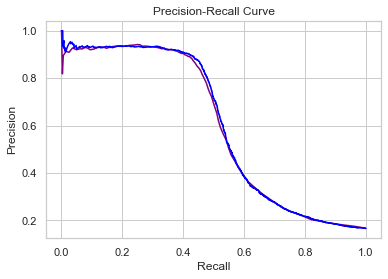

In [48]:
#calculate precision and recall
precision_RF_new, recall_RF_new, thresholds_RF_new = precision_recall_curve(y_test_new, y_score_RF_new)
precision_RF_tuned, recall_RF_tuned, thresholds_RF_tuned = precision_recall_curve(y_test_new, y_score_RF_tuned)

#create precision recall curve
fig, ax = plt.subplots()
ax.plot(recall_RF_new, precision_RF_new, color='purple')
ax.plot(recall_RF_tuned, precision_RF_tuned, color='blue')

#add axis labels to plot
ax.set_title('Precision-Recall Curve')
ax.set_ylabel('Precision')
ax.set_xlabel('Recall')

#display plot
plt.show()

#### Conclusion : from accuracy, confusion matrix and PR curve, the random forest after hyperparameter tuning has slight improvement

## 4.4 Use K - FOLD  
with K-FOLD to make sure the model is stable enough (not overfitting in a specific part of dataset)

In [76]:
from sklearn.model_selection import KFold

In [79]:
Kfmodel = KFold(n_splits=10)
RFmodel_k = RF_tuned
feature_k = X_new
target_k = y_new

#Feature Separation
X_yey_RF = feature_k.values

#Target Separation
y_eks_RF = target_k.values

Results = []
i = 0
confusion = np.array([[0,0],[0,0]])
for tr_in, te_in in Kfmodel.split(X_yey_RF):
    X_train_RF, X_test_RF = X_yey_RF[tr_in], X_yey_RF[te_in]
    y_train_RF, y_test_RF = y_eks_RF[tr_in], y_eks_RF[te_in]
    RFmodel_k.fit(X_train_RF,y_train_RF)
    score = RFmodel_k.score(X_test_RF, y_test_RF)
    
    confusion = confusion + confusion_matrix(y_test_RF,RF_tuned.predict(X_test_RF))
    
    print("Score in Random Forest_RF:",(score*100),"%")
    Results.append(score)
    i+=1

confusion_mean_RF = pd.DataFrame(confusion/10, index = ['Actual 0', 'Actual 1'], columns = ['Prediction 0', 'Prediction 1'])

Results = np.array(Results)
Mean_Results = Results.mean()
print ("\nMean :", Results.mean()*100,"%")



Score in Random Forest_RF: 89.04501071683735 %
Score in Random Forest_RF: 88.98547273160277 %
Score in Random Forest_RF: 88.90211955227436 %
Score in Random Forest_RF: 89.8428197189807 %
Score in Random Forest_RF: 90.04524886877829 %
Score in Random Forest_RF: 89.40223862824482 %
Score in Random Forest_RF: 89.43670358461355 %
Score in Random Forest_RF: 89.66297487197808 %
Score in Random Forest_RF: 89.21043229724901 %
Score in Random Forest_RF: 89.32952244849352 %

Mean : 89.38625434190526 %


In [80]:
#Average confusion matrix from K-FOLD
confusion_mean_RF

,Prediction 0,Prediction 1
Actual 0,6905.4,63.8
Actual 1,827.5,600.9


#### Conclusion : we can see from K-FOLD that the this model is stable enough

# 5. Predict testing data

In [59]:
# import testing data
data_test = pd.read_csv('findata_challenge_test.csv')

In [60]:
# check the head of data test
data_test.head()

,x0,x1,x2,x3,x4,x5,x6,x7,x8,x9,...,x115,x116,x117,x118,x119,x120,x121,x122,x123,x124
0,0.403735,-1.966104,-1.322339,0.084642,2.481997,-1.719155,5.0,2.0,-11.546670,-7.073770,...,3.580278,-7.765934,59.0,1.0,-9.897690,5.694125,-6.734618,17.052251,3.601040,2.873498
1,0.032128,6.516294,-0.939752,0.026937,-0.992999,5.995462,4.0,3.0,-5.634876,1.937998,...,5.783655,15.667015,47.0,1.0,7.781887,9.752716,5.918369,15.922908,5.460557,10.475816
2,-0.280345,0.930291,-1.028828,-0.050924,-3.164733,6.885108,3.0,2.0,1.609005,-1.812488,...,-0.389116,8.523648,55.0,0.0,6.815214,-3.325532,4.123546,-19.656038,8.380318,-1.203315
3,-0.313420,-0.568857,-1.576051,-0.003607,5.539969,-1.594770,4.0,3.0,-11.517734,-5.364282,...,3.930974,-13.912115,41.0,0.0,3.158137,-7.088875,-3.035983,34.277048,-3.169203,1.417681
4,0.108825,-4.815631,5.491084,-0.123928,-1.932024,4.014821,5.0,3.0,-3.117576,2.004889,...,-4.056091,-14.432712,52.0,0.0,-3.867657,-13.308519,1.008302,41.449381,-0.804560,-0.649453


In [61]:
#choose selected feature only
X_datatest = data_test[['x17', 'x15', 'x44', 'x68', 'x119','x67','x96',
              'x12','x59','x4','x105','x109','x102','x117',
              'x50','x61']]

In [78]:
#remove NULL values so model can predict 
X_datatest = X_datatest.dropna()

In [79]:
#predict 
final_prediction = RF_tuned.predict(X_datatest)

In [85]:
#save to CSV
pd.DataFrame(final_prediction, columns=['Predicted']).to_csv('Anugrah_Muzakki_Puar-submission.csv')

In [88]:
#In case FDC committee need my model too, I can provide it
!pip install joblib

In [90]:
import joblib

filename= 'Anugrah_Muzakki_Puar-FinalModel.sav'
joblib.dump(RF_tuned,filename)

['Anugrah_Muzakki_Puar-FinalModel.sav']